# Modal Analysis
#### A quick introduction modal analysis, modes and modeshapes 

Still a work in progress, if there is anything missing or you have some general feedback please contact Sjur Føyen at foyen.sjur@ntnu.no 

### Table of Contents 
1. Steady-state stability of multi-machine systems
2. Linear transformation to uncoupled equations
3. Modes: Time response of eigenvalues
4. How to interpretate mode shapes? Example
5. Limitations of mode shapes, solution: Participation factors!


Relevant Material from TET4180 Power System Stability and Control:
1. Slides
2. Textbook chapter 12



Code implemented by; Ingrid Wiig Arnesen.

Last update; 25. Feb 2025

In [1]:
#run this first!
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatText, HBox, VBox, FloatSlider
from IPython.display import display, Markdown
from scipy.signal import lti
import control as ctrl


## Steady-state stability of multi-machine systems
The steady-state, or small-signal, stability of an electric power system (EPS) is the ability of the system to maintain synchronism when subjected to a small disturbance. We have previously seen the eigenvalue analysis of the classical model of a synchronous generator connected to the infinite busbar, and showed that rotor swings around the synchronous speed can be described by a second-order differential equation (the swing equation):

$$ x = \begin{bmatrix} \delta \\ \Delta\omega \end{bmatrix}, \quad u = P_m $$


$$ \dot{x} = A x + B u $$

where:

$$ A = \begin{bmatrix} 0 & 2\pi f_N \\ -\frac{K_E'}{2H} & -\frac{D}{2H} \end{bmatrix}, \quad B = \begin{bmatrix} 0 \\ \frac{1}{2H} \end{bmatrix} $$

The system has eigenvalues:  
$$ \lambda = \alpha \pm j\Omega $$  

The damping ratio is given by:  
$$ \zeta = \frac{-\alpha}{\sqrt{\alpha^2 + \Omega^2}} $$  

The oscillation frequency is:  
$$ f = \frac{\Omega}{2\pi} $$  


However, real-life power systems include numerous generators and components with dynamics that must be described by a higher-order model. Consequently, a power system will be described by a high number of nonlinear differential equations. These differential equations describe how the states evolve over time based on system inputs and initial conditions. 

To simplify the stability analysis of a large dynamic power system, we can linearize the state equations around an operating point and investigate the system’s response to small perturbations. The system’s response can then be represented by a linear combination of uncoupled aperiodic and oscillatory responses. These responses are referred to as the _modes_ of a system.


We want to modify the differential equations of the state variables in a way that they are uncoupled from each other, meaning that for example the representation of $\dot{x_1}$ is not dependent on $x_2$ in that coordinate system. This can be done through a linear transformation to a coordinate system where the state equations are uncoupled. The idea is to change coordinates to the eigenvalue basis, in
which our dynamics are decoupled, solving these simple decoupled equations, and then changing back
to standard coordinates again:

<div style="text-align: center;">
    <img src="Figures/3-ModalAnalysis/Change_of_coordinates.png" alt="Coordinate Map" style="max-width: 50%;">
    <figcaption>Change of coordinates map.</figcaption>
</div>


The transformation is done as follows:

$$
z = W^{-1} x
$$

$$
\dot{z} = W^{-1} \dot{x}
$$

$$
\dot{z} = W^{-1} A x
$$

$$
\dot{z} = W^{-1} A W z
$$

$$
\dot{z} = \Lambda z
$$
where $ \Lambda $ is the diagonal matrix with the system´s eigenvalues:

$$
\begin{bmatrix}
\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
0 & 0 & \lambda_n
\end{bmatrix}
$$

On the eigenbasis, we get decoupled dynamic equations! This equation is the _modal form_ of the state equation. Each equation in  

$$
\dot{z} = \Lambda z
$$

can be solved independently and has a first-order solution:

$$
z_i = z_i(0) e^{\lambda_i t}
$$

To retrieve our solution in standard coordinates, we get:

$$
x = W z
$$

So that each state response $x_i$ can be written as a **weighted sum** / linear function of all $z$:


<div style="text-align: center;">
    <img src="Figures/3-ModalAnalysis/modes/x_t.png" alt="Modes_x" style="max-width: 50%;">
    <figcaption>Time expression of modes. </figcaption>
</div>




| **Eigenvalue** $$\lambda_i$$ | **real** | **complex pair** |
|-----------------------------|----------|------------------|
| **Notation** | $$\lambda_i = \alpha_i$$ | $$\lambda_i = \alpha_i + j\Omega_i, \lambda_i^* = \alpha_i - j\Omega_i$$ |
| **Mode definition** | $$e^{\alpha_i t}$$ | $$e^{\alpha_i t} \cdot \cos \omega_i t$$ |
| **Mode type** | aperiodic | oscillatory |
| **$$\alpha_i < 0 $$** | <img src="Figures/3-ModalAnalysis/modes/1.png" width="100"> | <img src="Figures/3-ModalAnalysis/modes/2.png" width="100">  |
| **$$\alpha_i > 0 $$** | <img src="Figures/3-ModalAnalysis/modes/3.png" width="100"> | <img src="Figures/3-ModalAnalysis/modes/4.png" width="100">  |
| **Corresponding to** | response of a first-order system | response of a second-order underdamped system |

#### Remember:

1. Real eigenvalues $ \lambda_i = \alpha_i $ introduce to the response of $ x_k(t) $ aperiodic modes that are proportional to $ e^{\alpha_i t} $. If $ \alpha_i < 0 $ then the corresponding aperiodic mode is stable and $ (-1/\alpha_i) $ is the time constant of exponential decay of the mode. If $ \alpha_i > 0 $ then the corresponding aperiodic mode is unstable and exponentially increasing.

2. Each conjugate pair of complex eigenvalues $ \lambda_i = \alpha_i \pm j\Omega_i $ introduces to the response of $ x_k(t) $ oscillatory modes proportional to $ e^{\alpha_i t} \cos(\Omega_i t + \phi_{ki}) $. If $ \alpha_i < 0 $ then the corresponding oscillatory mode is stable. If $ \alpha_i > 0 $ then the corresponding oscillatory mode is unstable. The term $ \Omega_i $ is the frequency of oscillation (in rad/s) of the oscillatory mode. The angle $ \phi_{ki} $ is the phase angle of the oscillatory mode and its value depends on the initial conditions.

3. The solution $ x_k(t) $ of a differential equation is a linear combination of the modes and the coefficients of proportionality in that combination depend on the initial conditions. As an oscillatory mode corresponds to a response of a second-order underdamped system while an aperiodic mode corresponds to a response of a first-order system, effectively a small-signal response of a dynamic system of high order is represented as a linear combination of responses of decoupled second- and first-order systems.

4. A dynamic system described by $ \dot{x} = A x $ is unstable if any of the modes are unstable.

### Let us now look at some examples of modes!
Given the three eigenvalues:

$$\lambda_1  = -3 + 8j $$

$$\lambda_2  = -2 $$

$$\lambda_3  = -0.01 + 3j $$

Run the cell below to check the modal response. Change the real and imaginary parts of the eigenvalues to see how they affect the modes:



In [ ]:
def plot_eigenvalues(eigenvalues, t_range):
    t = np.linspace(*t_range, 400)
    
    plt.figure(figsize=(12, 8))
    
    for idx, eigenvalue in enumerate(eigenvalues):
        alpha = eigenvalue.real
        omega = eigenvalue.imag
        
        if omega != 0:  # Check if the eigenvalue is complex
            mode_cos = np.exp(alpha * t) * np.cos(omega * t)
            plt.plot(t, mode_cos, label=f'$e^{{{alpha}t}} \\cdot \\cos({omega}t)$ for $\\lambda_{idx+1} = {eigenvalue}$')
        else:
            mode_exp = np.exp(alpha * t)
            plt.plot(t, mode_exp, label=f'$e^{{{alpha}t}}$ for $\\lambda_{idx+1} = {eigenvalue}$')
    
    plt.title('Modes for Given Eigenvalues')
    plt.xlabel('Time (t)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

def interactive_plot(lambda1_real, lambda1_imag, lambda2_real, lambda2_imag, lambda3_real, lambda3_imag):
    eigenvalues = [complex(lambda1_real, lambda1_imag), complex(lambda2_real, lambda2_imag), complex(lambda3_real, lambda3_imag)]
    t_range = (0, 12)
    plot_eigenvalues(eigenvalues, t_range)

# Display header
display(Markdown("## Change eigenvalues and check for modal response! :)"))

# Create interactive widgets
lambda1_real = FloatText(value=-3, description='λ1 Real:')
lambda1_imag = FloatText(value=8, description='λ1 Imag:')
lambda2_real = FloatText(value=-2, description='λ2 Real:')
lambda2_imag = FloatText(value=0, description='λ2 Imag:')
lambda3_real = FloatText(value=-0.01, description='λ3 Real:')
lambda3_imag = FloatText(value=3, description='λ3 Imag:')

# Arrange widgets next to each other
lambda1_box = HBox([lambda1_real, lambda1_imag])
lambda2_box = HBox([lambda2_real, lambda2_imag])
lambda3_box = HBox([lambda3_real, lambda3_imag])

ui = VBox([lambda1_box, lambda2_box, lambda3_box])

out = interact(interactive_plot, 
               lambda1_real=lambda1_real, lambda1_imag=lambda1_imag,
               lambda2_real=lambda2_real, lambda2_imag=lambda2_imag,
               lambda3_real=lambda3_real, lambda3_imag=lambda3_imag)

## Change eigenvalues and check for modal response! :)

interactive(children=(FloatText(value=-3.0, description='λ1 Real:'), FloatText(value=8.0, description='λ1 Imag…


### Mode shapes



We have now learned that each state variable can be expressed as a linear combination of modal variables:
$$
x_k (t) = \sum_{i=1}^{n} w_{ki} z_i (t)
$$

where \( w_{ki} \) is the \( k, i \) element of matrix **W** consisting of right eigenvectors. Expanding this equation gives:
$$
x_k (t) = w_{k1} z_1 (t) + w_{k2} z_2 (t) + \dots + w_{kj} z_j (t) + \dots + w_{kn} z_n (t)
$$

This equation shows that the right eigenvectors carry information about the **observability/weigth** of individual modal variables in individual state variables. If the eigenvectors are normalized, then $ w_{kj} $ determines the **magnitude and phase** of the share of modal variable $ z_j(t) $ in the activity of state variable $ x_k(t) $. This is referred to as the **mode shape**.

The mode shape plays an important role in **power system stability analysis**, especially for determining the influence of individual oscillatory modes on swings of rotors of individual generators.

### Let us now look at an example to improve our understanding of mode shapes:

Given a power system with topology as indicated in the figure below. A modal analysis has been performed
to understand the inherent stability properties of the system. 

<div style="text-align: center;">
    <img src="Figures/3-ModalAnalysis/power_system_modal.png" alt="modal sys" style="max-width: 65%;">
    <figcaption>System model. </figcaption>
</div>





The most important results from the modal analysis are summarised as follows:

- There were no eigenvalues in the complex right half-plane.

- Two pairs of complex eigenvalues were computed:

$$ \lambda_k = -0.1 + j3.14 \quad \lambda_{k+1} = -0.1 - j3.14 $$

$$ \lambda_l = -1.0 + j9.42 \quad \lambda_{l+1} = -1.0 - j9.42 $$

- The right eigenvectors associated with the two eigenvalues $ \lambda_k $ and $ \lambda_l $ were computed.  
  A part of the right eigenvector matrix is shown below:


<div style="text-align: center;">
    <img src="Figures/3-ModalAnalysis/modes/exam18.png" alt="modal sys matrix" style="max-width: 65%;">
    <figcaption></figcaption>
</div>


Let us now draw the mode shapes of the generator speeds, to say something about how the generators will swing subject to a small disturbance. Run the cell below!



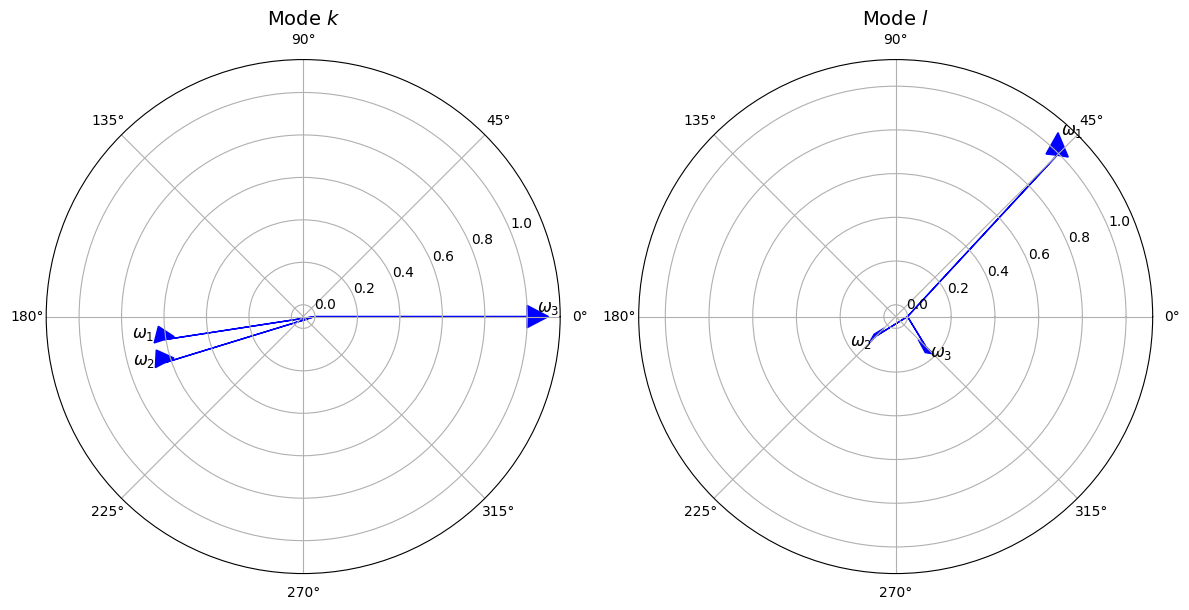

In [3]:
# Define mode k and mode l phasors
mode_k = np.array([-0.6 - 0.1j, -0.6 - 0.2j, 1.0 + 0j])
mode_l = np.array([0.7 + 0.7j, -0.05 - 0.05j, 0.1 - 0.1j])

# Labels for the phasors
labels = [r'$\omega_1$', r'$\omega_2$', r'$\omega_3$']

eigenvalue_k = -0.1 + 3.14j
eigenvalue_l = -1.0 + 9.42j

# Function to plot phasors
def plot_phasors(phasors, title, subplot_idx):
    angles = np.angle(phasors)  # Get angles in radians
    magnitudes = np.abs(phasors)  # Get magnitudes

    plt.subplot(1, 2, subplot_idx, polar=True)
    for i, (angle, magnitude) in enumerate(zip(angles, magnitudes)):
        plt.arrow(0, 0, angle, magnitude, head_width=0.1, head_length=0.1, fc='b', ec='b')
        plt.text(angle, magnitude + 0.1, labels[i], fontsize=12, ha='center', va='bottom')

    plt.title(title, fontsize=14)

# Create figure
plt.figure(figsize=(12, 6))

# Plot mode k
plot_phasors(mode_k, r'Mode $k$', 1)

# Plot mode l
plot_phasors(mode_l, r'Mode $l$', 2)

# Show plot
plt.tight_layout()
plt.show()

Let us now confirm how to generators will response subject to a small disturbance and compare to the mode shapes.
Run the cell below.


c:\Users\sigrids\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sigrids\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


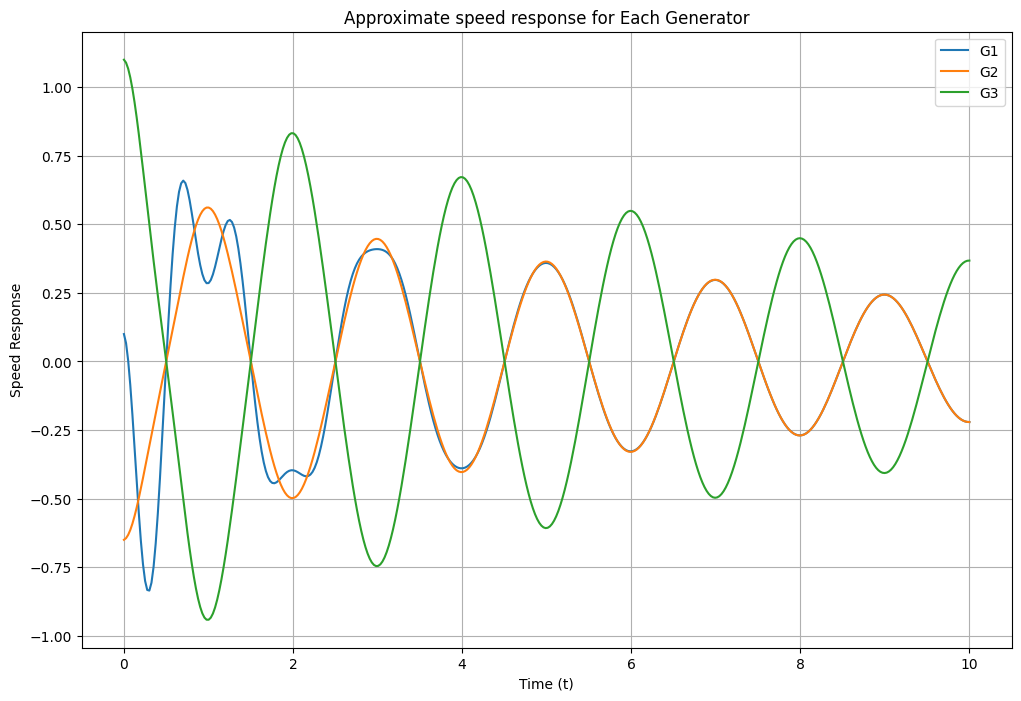

Damping of eigenvalue (-0.1+3.14j) is: 3.18% and frequency: 0.50 Hz
Damping of eigenvalue (-1+9.42j) is: 10.56% and frequency: 1.50 Hz


[(np.float64(3.183099571547569), np.float64(0.4997465213085514)),
 (np.float64(10.556396125772222), np.float64(1.4992395639256542))]

In [4]:

def calculate_mode_response(eigenvalue, t):
    alpha = eigenvalue.real
    omega = eigenvalue.imag
    if omega != 0:  # Check if the eigenvalue is complex
        mode_response = np.exp(alpha * t) * np.cos(omega * t)
    else:
        mode_response = np.exp(alpha * t)
    return mode_response

def calculate_speed_response(generators, modes_k, modes_l, eigenvalue_k, eigenvalue_l, t_range):
    t = np.linspace(*t_range, 400)
    
    mode_response_k = calculate_mode_response(eigenvalue_k, t)
    mode_response_l = calculate_mode_response(eigenvalue_l, t)
    
    plt.figure(figsize=(12, 8))
    
    for idx, generator in enumerate(generators):
        mode_k = modes_k[idx]
        mode_l = modes_l[idx]
        speed_response = mode_k * mode_response_k + mode_l * mode_response_l
        plt.plot(t, speed_response, label=f'{generator}')
    
    plt.title('Approximate speed response for Each Generator')
    plt.xlabel('Time (t)')
    plt.ylabel('Speed Response')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
generators = ["G1", "G2", "G3"]
modes_k = np.array([-0.6 - 0.1j, -0.6 - 0.2j, 1.0 + 0j])
modes_l = np.array([0.7 + 0.7j, -0.05 - 0.05j, 0.1 - 0.1j])
eigenvalue_k = complex(-0.1, 3.14)
eigenvalue_l = complex(-1.0, 9.42)
t_range = (0, 10)

#calculate damping and frequency of eigenvalues

calculate_speed_response(generators, modes_k, modes_l, eigenvalue_k, eigenvalue_l, t_range)

eigenvalues = [eigenvalue_k, eigenvalue_l]

def calc_damping_and_freq(eigenvalues):
    damping_frequencies = []
    for eigenvalue in eigenvalues:
        damping = -eigenvalue.real / np.sqrt(eigenvalue.real**2 + eigenvalue.imag**2) * 100
        frequency = np.abs(eigenvalue.imag) / (2 * np.pi)
        damping_frequencies.append((damping, frequency))
        print(f'Damping of eigenvalue {eigenvalue} is: {damping:.2f}% and frequency: {frequency:.2f} Hz')
    return damping_frequencies

calc_damping_and_freq(eigenvalues)

### Comparison mode shapes and the generator speed response 


We see that **Mode \( k \)** has very low damping (**3.18%**), which indicates that the system could undergo severe oscillations in the event of a disturbance. Since the frequency of the mode is **0.50 Hz**, it is an **inter-area mode**. This means that generators from different areas in the power system could swing against each other. From the mode shape of **Mode \( k \)**, we can clearly see that **Generator 3 swings against Generators 1 and 2**, and this behavior is reflected in the speed response as **Generator 3 swings against Generators 1 and 2 throughout the plot**. These **oscillations** decay slowly because the mode is **very poorly damped**!

**Mode \( l \)**, with a frequency of **1.50 Hz** and good damping (**10.56%**), is a **local mode** and is well damped. From the mode shape plot, we can see that the **phasor representing Generator 1 has a much higher amplitude compared to the phasors of Generators 3 and 2**. This means that the mode is much more visible in **Generator 1**. This is evident in the speed plot just after the disturbance, where **Generator 1 exhibits some non-sinusoidal waves**. However, after **2.2 seconds**, the sine wave of **Generator 1** returns to normal. This happens because the mode causing these **unusual oscillations** is **quickly damped**.

### Limitations regarding modeshapes to analyze system dynamics

Mode shapes can only be used to compare state variables of the same type. For example, to understand how different generators swing against each other, we analyze the magnitudes and angles of the phasors in the mode shape plot. These phasors indicate how much each generator is influenced by the mode in response to a perturbation.

In the previous example, we had three generators, and their mode shape phasors showed the relative impact of the mode on each generator. However, if we were to compare generator speed responses to rotor angles, the phasor scaling would be incorrect. This is because mode shapes describe relative influence only within the same type of state variable. Mixing different types of variables (e.g., speed vs. angle) would lead to misleading interpretations.

### This leaves us the question: how to compare how much a given mode will influence different types of state variables? 
The solution is participation factors! These provide a way to measure how much a given mode influences different state variables, even if they are of different types. This will be introduced in lectures and in another notebook!



